Q1. Create a file “people.txt”.

i)	Read the data from the file “people.txt”.

ii)	Create a ruleset E that contain rules to check for the following conditions:
1.	The age should be in the range 0-150.
2.	The age should be greater than yearsmarried.
3.	The status should be married or single or widowed.
4.	If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.

iii)	Check whether ruleset is violated by the data in the file people.txt.

iv) 	Summarize the results obtained in part (iii)

v)	 Visualize the results obtained in part (iii)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DFrame = pd.DataFrame(pd.read_csv("/home/xtechilad/Documents/DDU/people.csv"))
DFrame

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [9]:
def rules(DFrame):
    DFrame['Rule1'] = DFrame['Age'].apply(lambda x:True if x>0 and x<151 else False)
    DFrame['Rule2'] = DFrame.apply(lambda x:True if x.Age>x.yearsmarried else False, axis = 1)
    DFrame['Rule3'] = DFrame['status'].apply(lambda x:True if x == 'married' or x == 'single' or x == 'widowed' else False)
    DFrame['Rule4'] = DFrame.apply(lambda x:True if (x.Age<18 and x.agegroup == 'child') or (x.Age>18 and x.Age<65 and x.agegroup == 'adult') or (x.Age>65 and x.agegroup == 'elderly') else False, axis = 1)
    return DFrame

In [10]:
DFrame_with_rules = rules(DFrame)
DFrame_with_rules

,Age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,False
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


In [11]:
DFrame_with_rules['Rule1'] = DFrame_with_rules['Rule1'].astype(int)
DFrame_with_rules['Rule2'] = DFrame_with_rules['Rule2'].astype(int)
DFrame_with_rules['Rule3'] = DFrame_with_rules['Rule3'].astype(int)
DFrame_with_rules['Rule4'] = DFrame_with_rules['Rule4'].astype(int)

In [12]:
DFrame_with_rules[['Rule1', 'Rule2', 'Rule3', 'Rule4']].describe()

,Rule1,Rule2,Rule3,Rule4
count,5.000000,5.000000,5.0,5.000000
mean,0.800000,0.800000,1.0,0.600000
std,0.447214,0.447214,0.0,0.547723
min,0.000000,0.000000,1.0,0.000000
25%,1.000000,1.000000,1.0,0.000000
50%,1.000000,1.000000,1.0,1.000000
75%,1.000000,1.000000,1.0,1.000000
max,1.000000,1.000000,1.0,1.000000


Text(0.5, 1.0, 'Ruleset Plot')

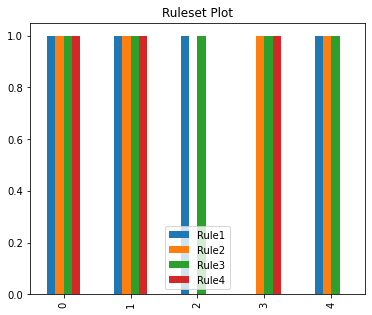

In [13]:
DFrame_with_rules.plot(y = ['Rule1', 'Rule2', 'Rule3', 'Rule4'],kind = 'bar', figsize = (6, 5))
plt.title('Ruleset Plot')